🎯 EDA Objective
    Understand mandi-wise, crop-wise, and time-wise price behavior to:

    Identify trends & seasonality

    Detect outliers and anomalies

    Understand feature importance

    Decide feature engineering strategies

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv("../../data/processed/cleaned_data.csv")

In [55]:
df.head()

,id,district,market,commodity,variety,grade,min_price,max_price,modal_price,date,state
0,1,Auraiya,Achalda,Wheat,Dara,FAQ,2350.0,2550.0,2450.0,2025-04-05,Uttar Pradesh
1,2,Auraiya,Achalda,Wheat,Dara,FAQ,2400.0,2500.0,2470.0,2025-06-14,Uttar Pradesh
2,3,Auraiya,Achalda,Wheat,Dara,FAQ,2400.0,2500.0,2470.0,2025-06-23,Uttar Pradesh
3,4,Auraiya,Achalda,Wheat,Dara,FAQ,2400.0,2520.0,2470.0,2025-06-26,Uttar Pradesh
4,5,Auraiya,Achalda,Wheat,Dara,FAQ,2400.0,2550.0,2500.0,2025-06-03,Uttar Pradesh


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117630 entries, 0 to 1117629
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1117630 non-null  int64  
 1   district     1117630 non-null  object 
 2   market       1117630 non-null  object 
 3   commodity    1117630 non-null  object 
 4   variety      1117630 non-null  object 
 5   grade        1117630 non-null  object 
 6   min_price    1117630 non-null  float64
 7   max_price    1117630 non-null  float64
 8   modal_price  1117630 non-null  float64
 9   date         1117630 non-null  object 
 10  state        1117630 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 93.8+ MB


In [57]:
df.describe()

,id,min_price,max_price,modal_price
count,1.117630e+06,1.117630e+06,1.117630e+06,1.117630e+06
mean,9.955167e+03,3.980842e+03,4.648780e+03,4.360376e+03
std,9.639224e+03,4.341992e+03,4.854508e+03,4.528942e+03
min,1.000000e+00,1.000000e+00,2.200000e+01,2.000000e+01
25%,2.597000e+03,2.000000e+03,2.360000e+03,2.225000e+03
50%,6.857000e+03,3.000000e+03,3.800000e+03,3.500000e+03
75%,1.446200e+04,5.125000e+03,6.000000e+03,5.670000e+03
max,4.585900e+04,2.470000e+05,6.615110e+05,2.500000e+05


In [58]:
df['date'] = pd.to_datetime(df['date'])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117630 entries, 0 to 1117629
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1117630 non-null  int64         
 1   district     1117630 non-null  object        
 2   market       1117630 non-null  object        
 3   commodity    1117630 non-null  object        
 4   variety      1117630 non-null  object        
 5   grade        1117630 non-null  object        
 6   min_price    1117630 non-null  float64       
 7   max_price    1117630 non-null  float64       
 8   modal_price  1117630 non-null  float64       
 9   date         1117630 non-null  datetime64[ns]
 10  state        1117630 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 93.8+ MB


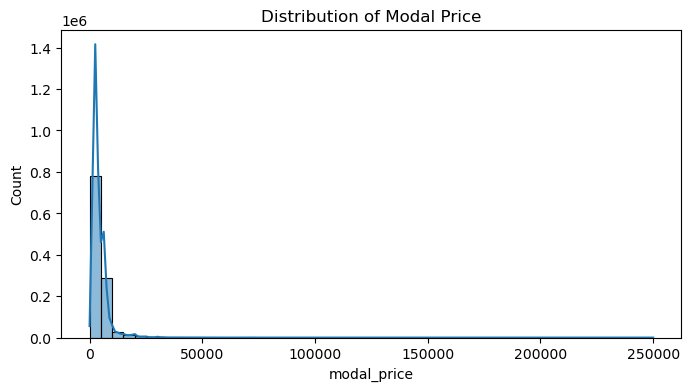

In [60]:
plt.figure(figsize=(8,4))
sns.histplot(df['modal_price'], bins=50, kde=True)
plt.title("Distribution of Modal Price")
plt.show()


✅ Conclusion
Distribution is extremely right-skewed

This is real market behavior, not data error

🛠️ Solution
Consider log / power transform later

Prefer robust or tree-based models

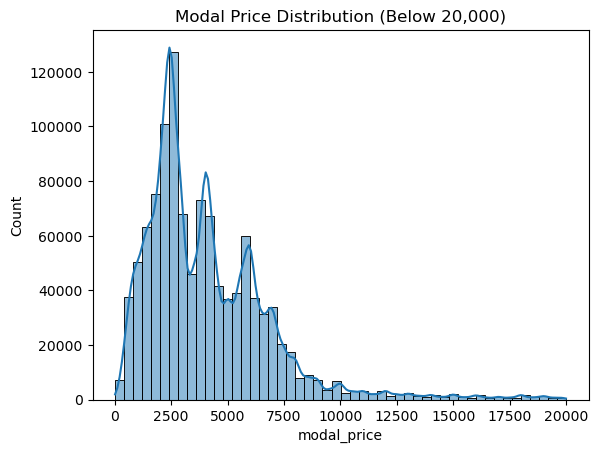

In [61]:
sns.histplot(df[df['modal_price'] < 20000]['modal_price'], bins=50, kde=True)
plt.title("Modal Price Distribution (Below 20,000)")
plt.show()


✅ Conclusion
Skewness exists at both global and local scales

🛠️ Solution
Transformation alone won’t fully normalize

Need time + commodity-aware features

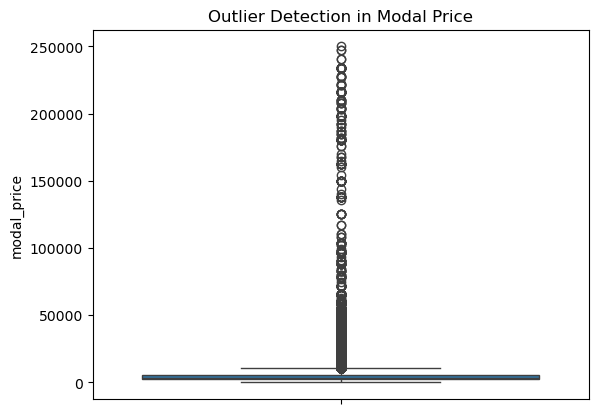

In [62]:
sns.boxplot(y=df['modal_price'])
plt.title("Outlier Detection in Modal Price")
plt.show()


✅ Conclusion
Outliers are systematic and meaningful

Not noise, not data errors

🛠️ Solution
Do NOT remove

Handle via:

Transformations

Segmentation

Robust models



In [63]:
df.groupby('commodity')['modal_price'].skew().sort_values(ascending=False).head(10)


commodity
Cauliflower              22.181509
Ginger(Green)            11.661154
Garlic                    9.939817
Cabbage                   9.175765
Carrot                    8.942110
Bhindi(Ladies Finger)     7.199219
Brinjal                   6.244998
Green Chilli              4.755902
Groundnut                 1.913328
Lentil (Masur)(Whole)     1.883685
Name: modal_price, dtype: float64

Boxplot analysis reveals a large number of extreme high-value outliers in modal prices, with most observations concentrated in a narrow lower range. Commodity-wise skewness analysis shows that extreme skewness is present even in commonly traded vegetables such as cauliflower, cabbage, and carrot. This indicates that price volatility and skewness are intrinsic to commodity behavior rather than isolated data anomalies.



In [52]:
df['modal_price'].skew()


np.float64(17.32676366747916)

In [34]:
df['commodity'].value_counts().head(100)


commodity
Brinjal                        111771
Green Chilli                   105125
Bhindi(Ladies Finger)           71913
Mustard                         71357
Wheat                           71283
Cauliflower                     69668
Cabbage                         65473
Soyabean                        57744
Ginger(Green)                   55196
Apple                           54923
Maize                           54255
Garlic                          52523
Carrot                          44277
Banana                          35844
Bajra(Pearl Millet/Cumbu)       31019
Lentil (Masur)(Whole)           29575
Gur(Jaggery)                    29235
Groundnut                       22523
Cotton                          22476
Green Gram (Moong)(Whole)       18924
Arhar (Tur/Red Gram)(Whole)     18586
Mango                           15002
Jowar(Sorghum)                   8938
Name: count, dtype: int64

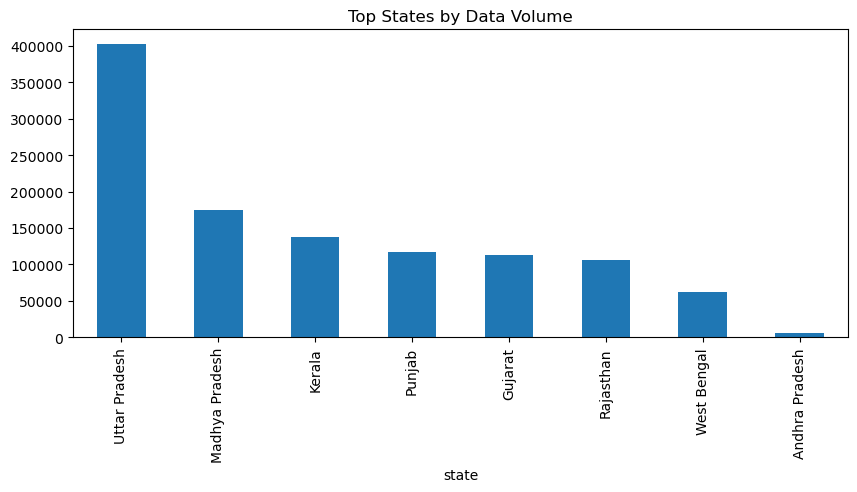

In [40]:
plt.figure(figsize=(10,4))
df['state'].value_counts().head(10).plot(kind='bar')
plt.title("Top States by Data Volume")
plt.show()


In [44]:
df['state'].unique()

array(['Uttar Pradesh', 'West Bengal', 'Rajasthan', 'Punjab',
       'Madhya Pradesh', 'Gujarat', 'Andhra Pradesh', 'Kerala'],
      dtype=object)

In [45]:
df['state'].value_counts().head(10)

state
Uttar Pradesh     402337
Madhya Pradesh    174932
Kerala            137008
Punjab            116490
Gujarat           112803
Rajasthan         106699
West Bengal        61961
Andhra Pradesh      5400
Name: count, dtype: int64

In [47]:
df['market'].nunique()


1386

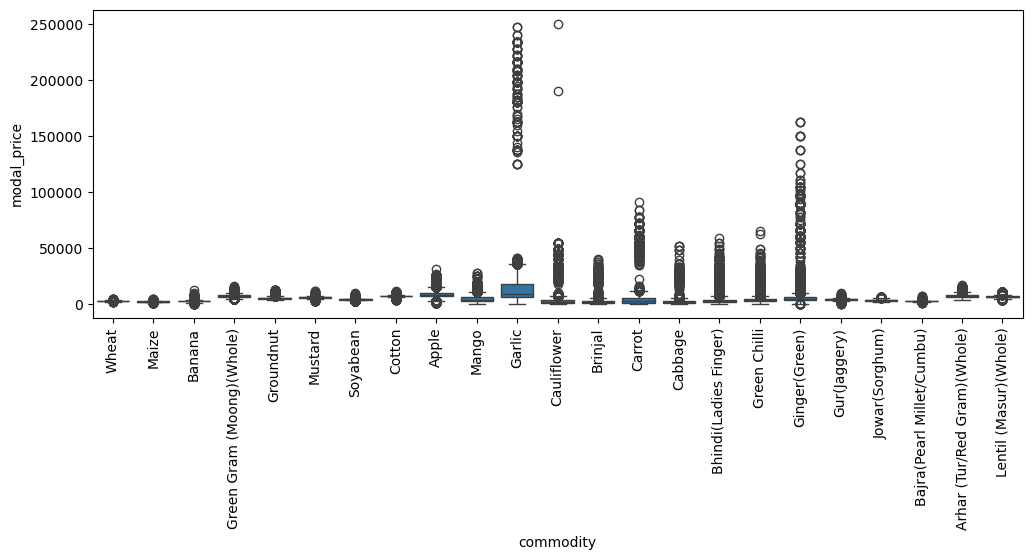

In [48]:
plt.figure(figsize=(12,4))
sns.boxplot(x='commodity', y='modal_price', data=df)
plt.xticks(rotation=90)
plt.show()


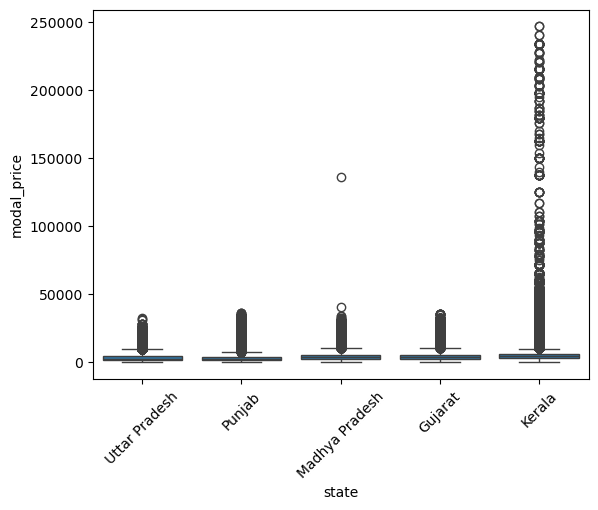

In [66]:
top_states = df['state'].value_counts().head(5).index

sns.boxplot(
    x='state',
    y='modal_price',
    data=df[df['state'].isin(top_states)]
)
plt.xticks(rotation=45)
plt.show()


Modal prices vary significantly across states, with noticeable differences in median values and price dispersion. Certain states, such as Kerala, exhibit extreme high-price outliers and greater variability, indicating state-specific crop composition and market dynamics. This confirms that geographical location is a strong determinant of crop pricing behavior.

✅ Conclusion
Geography strongly influences price

State is a key predictive feature

🛠️ Solution
Encode state carefully

Consider state-commodity interactions



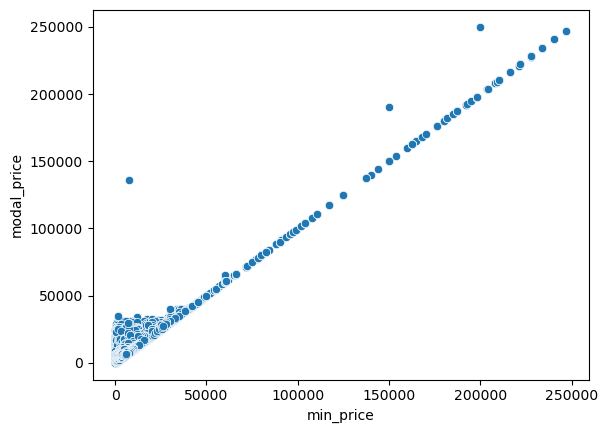

In [68]:
sns.scatterplot(
    x='min_price',
    y='modal_price',
    data=df
)
plt.show()


The scatter plot between minimum price and modal price shows a strong positive linear relationship, confirming that the pricing data adheres to real-world market constraints (min ≤ modal). The absence of systematic deviations indicates high data integrity and consistency across markets and commodities.


✅ Conclusion
Data is logically consistent

Price columns are reliable

🛠️ Solution
Safe to use min_price as predictor

Confirms dataset integrity

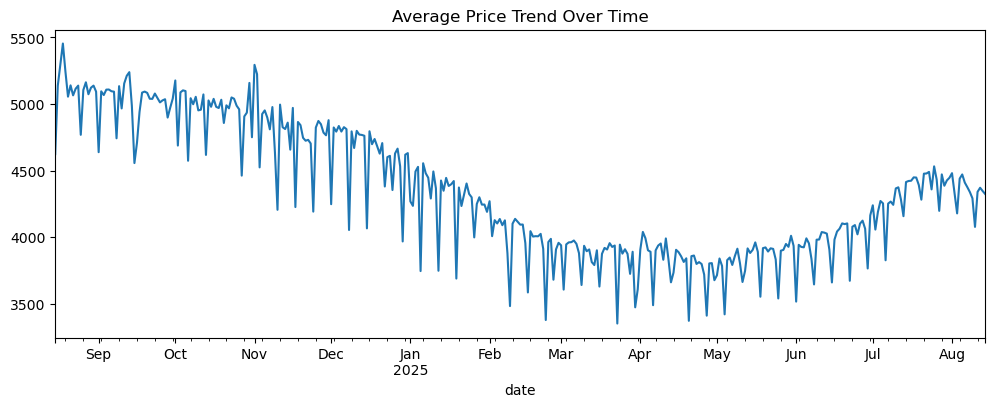

In [69]:
df['date'] = pd.to_datetime(df['date'])

daily_avg = df.groupby('date')['modal_price'].mean()

daily_avg.plot(figsize=(12,4))
plt.title("Average Price Trend Over Time")
plt.show()


The average modal price exhibits a clear long-term trend, declining from late monsoon to early summer and gradually increasing thereafter, indicating non-stationary behavior.

The time series shows recurring short-interval dips, suggesting strong weekly seasonality effects likely driven by market operation cycles and reporting patterns.

✅ Conclusion
Series is non-stationary

Time dependency is strong

🛠️ Solution
Use temporal split

Add lag & rolling features

# Final conclusion from price vs month trend

Time-series analysis of average modal prices reveals a clear long-term trend with seasonal fluctuations. Prices decline during peak supply periods and recover during lean months, indicating strong seasonal effects. Regular short-term dips suggest weekly market cycles. The absence of abrupt shocks indicates stable price dynamics, making the data suitable for time-aware predictive modeling.

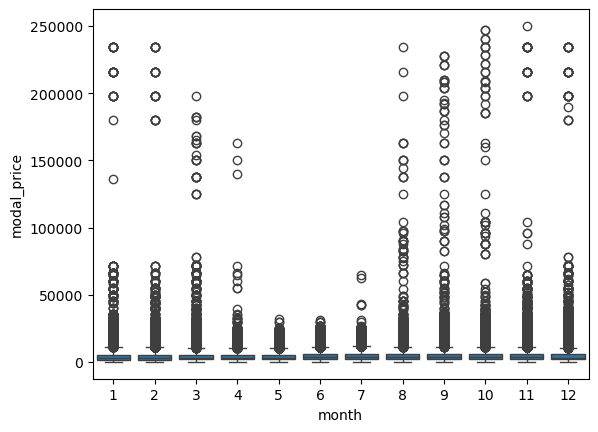

In [71]:
df['month'] = df['date'].dt.month

sns.boxplot(x='month', y='modal_price', data=df)
plt.show()


Month-wise boxplot analysis reveals strong seasonal patterns in modal prices, with distinct differences in median values and variability across months. Prices tend to be lower during peak harvest months and higher during lean supply periods. The presence of month-specific volatility and extreme values confirms that seasonality is a key driver of price dynamics, making calendar-based features essential for accurate price prediction.

✅ Conclusion
Seasonality is strong and repeatable

🛠️ Solution
Month, week, season must be features

Calendar effects are mandatory

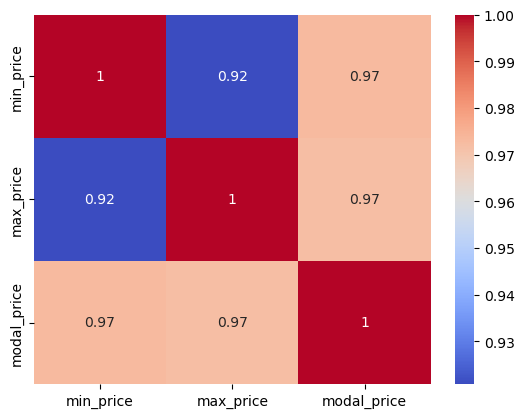

In [73]:
price_cols = [
    'min_price',
    'max_price',
    'modal_price'
]

sns.heatmap(df[price_cols].corr(), annot=True, cmap='coolwarm')
plt.show()


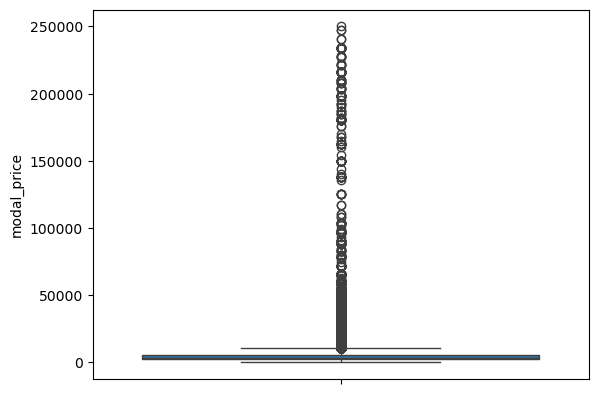

In [74]:
sns.boxplot(y=df['modal_price'])
plt.show()


Exploratory analysis confirms strong internal consistency among price variables, with minimum, maximum, and modal prices exhibiting high positive correlation. While modal prices show extreme positive skewness and numerous high-value outliers, these observations are systematic and commodity-driven rather than erroneous. Time-series and seasonal analysis further indicate structured trends and periodic patterns. Overall, the dataset demonstrates high integrity and strong suitability for predictive modeling.

The target variable (modal price) exhibits extreme positive skewness (skewness ≈ 17), indicating a heavy right-tailed distribution. This behavior is caused by a small number of very high-priced commodities. Such skewness may negatively impact regression model performance and suggests the need for target transformation or robust modeling techniques during feature engineering.

